In [3]:

import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os




57it [02:37,  5.24s/it]/opt/tmp/tmp/ipykernel_172778/3182400881.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"./results/power_law/50000_banks_1_million_step_100_g_2percent_year/{t}_stationarity_random_growth.png")
58it [02:42,  5.33s/it]/opt/tmp/tmp/ipykernel_172778/3182400881.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"./results/power_law/50000_banks_1_million_step_100_g_2percent_year/{t}_stationarity_random_growth.png")
59it [02:48,  5.42s/it]/opt/tmp/tmp/ipykernel_172778/3182400881.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"./results/power_law/50000_banks_1_million_step_100_g_2percent_year/{t}_stationarity_random_growth.png")
60it [02:53,  5.51s/it]/opt/tmp/tmp/ipykernel_172778/3182400881.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"

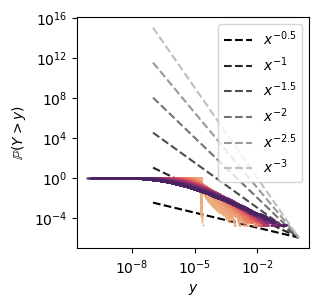

In [6]:
# Teted conditions
path = "test_reel_100000_banks_vol_100_g_2percent_year"
T = 1000000
nb_banks = int(5e4)
init_money_min = 1e-2
ar_current_money = np.ones(nb_banks)*init_money_min
df_money = pd.DataFrame(columns=range(nb_banks))

g = 0.02/250
new_loans_vol = 100
sr_money_min = pd.Series([np.exp(g*t) for t in range(T)])*init_money_min

fig, ax = plt.subplots(figsize=(3,3))
index = np.logspace(-7,0)

ref= 1e-6
plt.plot(index, [ref/x**0.5 for x in index], "--",color="0",)
plt.plot(index, [ref/x**1 for x in index], "--",color="0.15")
plt.plot(index, [ref/x**1.5 for x in index], "--",color="0.30")
plt.plot(index, [ref/x**2 for x in index], "--",color="0.45")
plt.plot(index, [ref/x**2.5 for x in index], "--",color="0.60")
plt.plot(index, [ref/x**3 for x in index], "--",color="0.75")
plt.legend([r"$x^{-0.5}$",r"$x^{-1}$",r"$x^{-1.5}$",r"$x^{-2}$",r"$x^{-2.5}$",r"$x^{-3}$"])

colors = sns.color_palette("flare", n_colors=len(range(0,T,5000)))

os.makedirs(f"./results/article_plots/",exist_ok=True)
os.makedirs(f"./results/power_law/50000_banks_1_million_step_100_g_2percent_year/",exist_ok=True)

for i, t in tqdm(enumerate(range(0,T,5000))):
        try:
            df_ccdf = pd.read_csv(f"./results/power_law/{path}/{t}_df_ccdf.csv")
        except:
            pass
        
        plt.plot(df_ccdf["data"],df_ccdf["rank"],".",color=colors[i], markersize=1)
        plt.yscale("log")
        plt.xscale("log")
        plt.ylabel(r"$\mathbb{P}(Y > y)$")
        plt.xlabel(r"$y$")
        plt.savefig(f"./results/power_law/50000_banks_1_million_step_100_g_2percent_year/{t}_stationarity_random_growth.png")

plt.savefig(f"./results/article_plots/stationarity_random_growth.png")


In [46]:
np.exp()

0.0004

Text(0.5, 0, '$y$')

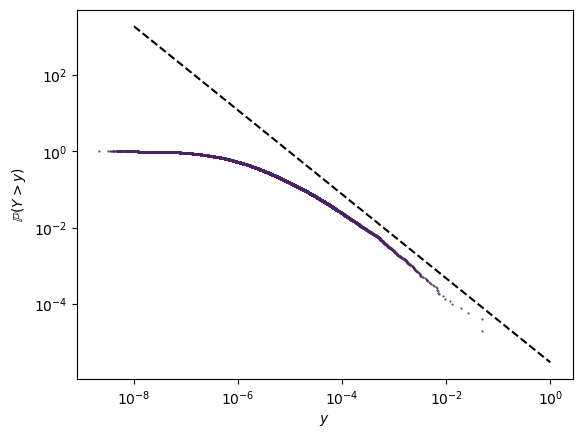

In [31]:
index = np.logspace(-8,0)
plt.plot(index, [3e-6/x**1.1 for x in index], "--",color="0")
plt.plot(df_ccdf["data"],df_ccdf["rank"],".",color=colors[i],markersize=1)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$\mathbb{P}(Y > y)$")
plt.xlabel(r"$y$")

200it [00:27,  7.26it/s]


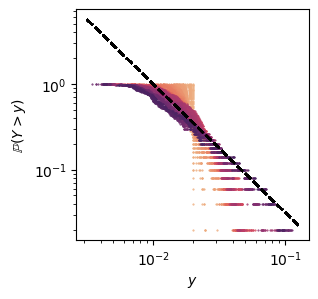

In [45]:
# Teted conditions
T = 100000
nb_banks = int(5e4)
init_money_min = 1e-2
ar_current_money = np.ones(nb_banks)*init_money_min
df_money = pd.DataFrame(columns=range(nb_banks))
path = "test_reel_50_banks"

g = 0.02/250
new_loans_vol = 100
sr_money_min = pd.Series([np.exp(g*t) for t in range(T)])*init_money_min

fig, ax = plt.subplots(figsize=(3,3))
index = np.logspace(-2.5,-0.9)

colors = sns.color_palette("flare", n_colors=len(range(0,T,500)))

os.makedirs(f"./results/article_plots/",exist_ok=True)

for i, t in tqdm(enumerate(range(0,T,500))):
        try:
            df_ccdf = pd.read_csv(f"./results/power_law/{path}/{t}_df_ccdf.csv")
        except:
            pass
        
        plt.plot(df_ccdf["data"],df_ccdf["rank"],".",color=colors[i], markersize=1)
        plt.yscale("log")
        plt.xscale("log")
        plt.ylabel(r"$\mathbb{P}(Y > y)$")
        plt.xlabel(r"$y$")
        plt.plot(index, [1e-3/x**1.5 for x in index], "--",color="0")
        plt.savefig(f"./results/power_law/50_banks_100000_steps/{t}_stationarity_random_growth_50_banks.png")
        

plt.plot(index, [1e-3/x**1.5 for x in index], "--",color="0")

plt.savefig(f"./results/article_plots/stationarity_random_growth_50_banks.png")